In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# Define irradiance data for every hour (8am to 5pm) for 5 days
irradiance_data = np.array(
    [
        [86, 301, 531, 717, 859, 936, 932, 855, 708, 515],  # Day 1
        [164, 403, 637, 851, 986, 1046, 1029, 936, 776, 569],  # Day 2
        [143, 397, 645, 845, 977, 1039, 1027, 940, 786, 576],  # Day 3
        [244, 493, 723, 912, 1034, 1089, 1067, 982, 825, 617],  # Day 4
        [309, 535, 727, 893, 993, 1026, 990, 889, 731, 530],  # Day 5
    ]
)

# Car Constants
battery_capacity = 5.3  # kWh
available_soc = 0.998  # 90%
panel_area = 4  # m^2
panel_efficiency = 0.22  # 23%
MPPT_efficiency = 0.98  # 95%
motor_efficiency = 0.98  # 85%
wheel_radius = 19 / 39.37  # Convert inches to meters
mass = 270  # kg
no_of_wheels = 3
aerodynamic_coef = 0.
frontal_area = 0.855  # m^2
zero_speed_crr = 0.005
headwind = 3.6  # m/s
speed = 75 * 5 / 18  # m/s
distance = 3024 # km

num_days = 5  # Number of days
time_interval = 1  # Time interval between readings (in hours)
num_readings_per_day = (
    9 * 60 // time_interval
)  # Total number of readings per day (including interpolated values)
all_irradiance = np.empty(
    (num_days, num_readings_per_day)
)  # Create empty array to store all irradiance values for all day

# Loop through each day's irradiance data
for day in range(num_days):
    # Interpolate data for each minute of the day
    all_irradiance[day] = np.interp(
        np.linspace(0, 8, num_readings_per_day),
        np.arange(len(irradiance_data[day])),
        irradiance_data[day],
    )

In [8]:
instantanous_power = np.empty((num_days, num_readings_per_day))
for day in range(num_days):
    instantanous_power[day] = all_irradiance[day]

# Calculate the total energy generated by the solar panel each day
daily_energy = np.sum(instantanous_power, axis=1)/(60*1000)
total_solar_energy = np.sum(daily_energy)

print("Total Energy Generated (kWh):", np.sum(daily_energy))

Total Energy Generated (kWh): 35.555331478045765


In [9]:
# friction_force = mass * 9.8 * (zero_speed_crr+(no_of_wheels / 3) * (4.1 * 10 ** (-5) * speed))
friction_force = (
    mass * 9.8 * (zero_speed_crr)
)  # Assume coefficient of friction = 0.01
drag_force = frontal_area* 0.5 * aerodynamic_coef * 1.225 * (headwind+speed)**2 # Air density = 1.225 kg/m^3

frictional_energy_loss = friction_force * distance/3600
drag_energy_loss = drag_force * distance/3600
motor_loss = (frictional_energy_loss + drag_energy_loss)/motor_efficiency 
solar_energy_gain = total_solar_energy * panel_efficiency * panel_area * MPPT_efficiency
battery_energy_gain = battery_capacity * available_soc

print("Friction Force:", friction_force)
print("Drag Force:", drag_force)
print("Solar Energy Gain (kWh):", solar_energy_gain)
print("Battery Energy Gain (kWh):", battery_capacity)
print("Frictional Energy Loss (kWh):", frictional_energy_loss)
print("Drag Energy Loss (kWh):", drag_energy_loss)
print("Net Energy Gain (kWh):", solar_energy_gain + battery_energy_gain - motor_loss)

Friction Force: 13.23
Drag Force: 31.451084709624997
Solar Energy Gain (kWh): 30.662917866666668
Battery Energy Gain (kWh): 5.3
Frictional Energy Loss (kWh): 11.1132
Drag Energy Loss (kWh): 26.418911156085
Net Energy Gain (kWh): -2.3457547415833346


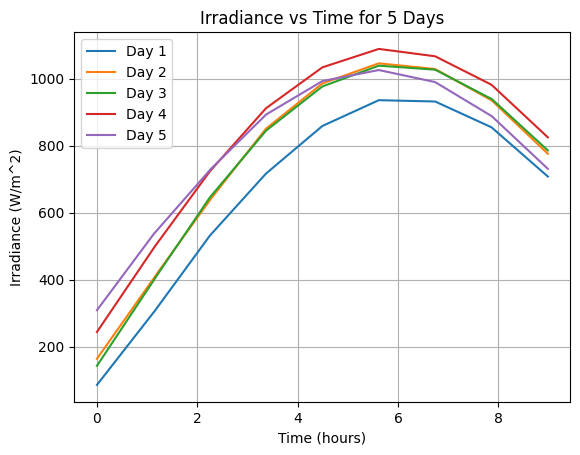

In [10]:
# Time interval between readings (in hours)
time_interval = 1/60  # Convert to hours for plotting

# Create time labels for every minute of the day
time_labels = np.arange(0, 9, time_interval)

# Plot irradiance vs time for each day
for day in range(irradiance_data.shape[0]):
    plt.plot(time_labels, instantanous_power[day], label=f"Day {day+1}")

plt.xlabel("Time (hours)")
plt.ylabel("Irradiance (W/m^2)")
plt.title("Irradiance vs Time for 5 Days")
plt.legend()
plt.grid(True)
plt.show()